In [2]:
%matplotlib inline
import os 
import pandas as pd
import numpy as np 
import sklearn
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import mean_squared_error as mse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import re 
from datetime import datetime
from datetime import timedelta
import calendar
from sklearn import preprocessing
from sklearn import datasets,tree
from IPython.display import Image 
from sklearn.tree import DecisionTreeRegressor

from itertools import *
from scipy.stats import spearmanr
# import pydotplus 
# from bokeh.charts import HeatMap, bins, output_file, show
# from bokeh.layouts import column, gridplot
# from bokeh.palettes import RdYlGn6, RdYlGn9

## Predictions Exploration 

This code explore the models obtained from the MongoDB database with models of the DSSG Cincinnati project.
It provides basic statistics about models and provides a list with the top n models based on different criteria. 

## Model preparation
Load data from models and predictions to create one single CSV file 

In [3]:
os.chdir("/mnt/data/economic_development/MLPPLab-Cincinnati/Explore/Data")

In [4]:
data = pd.read_csv("final_output.csv")
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'model_id', 'validation_date',
       'radius_features', 'time_features', 'date', 'prediction', 'violations',
       'inspections', 'houses', 'inspection_density', 'violation_density'],
      dtype='object')

In [5]:
os.chdir("/mnt/data/economic_development/MLPPLab-Cincinnati/LAB")

In [6]:
models = pd.read_csv("output_csv.csv")

In [7]:
data = data.merge(models, left_on = "model_id", right_on = "||_id")

In [7]:
data.head()

,Unnamed: 0,Unnamed: 0.1,model_id,validation_date,radius_features,time_features,date,prediction,violations,inspections,...,||parameters||max_iter,||config||parameters||intercept_scaling,||config||parameters||dual,||config||parameters||fit_intercept,||config||parameters||multi_class,||parameters||fit_intercept,||parameters||tol,||config||parameters||max_iter,||parameters||C,||parameters||multi_class
0,0,0,583fbcede8f71ee15e3327d3,31Dec2015,Parcel_Only,Parcel_Only,31dec2015,0.595704,23.146012,37.581345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,583fbceee8f71ee15e3327d5,31Dec2015,Parcel_Only,Parcel_Only,31dec2015,0.758698,32.889539,49.434843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,583fbcefe8f71ee15e3327d7,31Dec2015,Parcel_Only,Parcel_Only,31dec2015,0.942378,17.135130,29.281726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,583fbcf1e8f71ee15e3327d9,31Dec2015,Parcel_Only,Parcel_Only,31dec2015,1.000000,22.730543,36.903270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,583fbcf2e8f71ee15e3327db,31Dec2015,Parcel_Only,Parcel_Only,31dec2015,1.000000,24.156563,38.768454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'model_id', 'validation_date',
       'radius_features', 'time_features', 'date', 'prediction', 'violations',
       'inspections', 'houses', 'inspection_density', 'violation_density',
       '||config||models', '||parameters||max_features',
       '||config||parameters||random_state', '||cutoff_at_1',
       '||config||experiment_name', '||cutoff_at_5', '||name',
       '||config||parameters||max_depth', '||config||parameters||bootstrap',
       '||_id', '||parameters||max_depth', '||config||parameters||warm_start',
       '||config||parameters||class_weight', '||parameters||n_estimators',
       '||prec_at_20', '||config||start_date', '||config||parameters||n_jobs',
       '||parameters||criterion', '||prec_at_1', '||config||residential_only',
       '||cutoff_at_20', '||prec_at_5', '||parameters||max_leaf_nodes',
       '||parameters||verbose', '||experiment_name',
       '||config||parameters||verbose', '||parameters||n_jobs',
       '||paramete

## Maximizing efficiency
The City of Cincinnati is interested in having efficient inspections that are able to predict violations
before they are ocurring, however, they might also be interested in finding parcels in places that have a low 
inspection or violation density to craft more responsive policies.

The following graphs show the distribution of the indicators


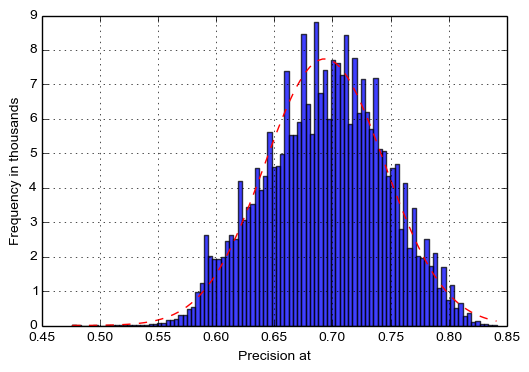

In [111]:
# Graph the histograms of indicators 

## CHOOSE PRECISION AT N (as a string)
PRECISION_N = "" 

precision = "||prec_at_10"

mu = data[precision].mean()
sigma = data[precision].std()

# the histogram of the data
n, bins, patches = plt.hist( data[precision], 100, normed = True, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Precision at '+ PRECISION_N)
plt.ylabel("Frequency in thousands")
plt.grid(True)

plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


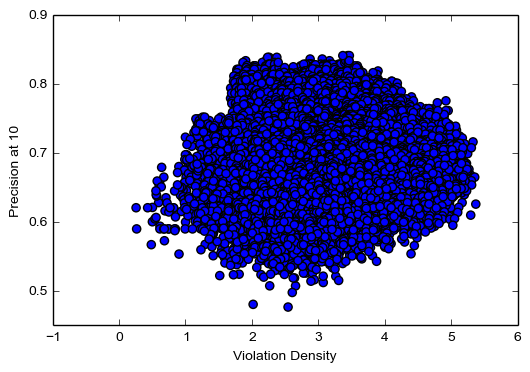

In [76]:
cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(data["violation_density"] * 100, data["||prec_at_10"],
                   s = 35, cmap = cm)

plt.xlabel('Violation Density')
plt.ylabel('Precision at 10')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


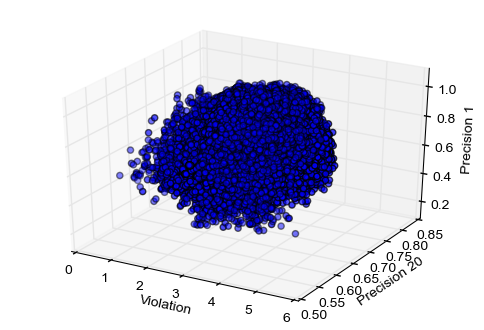

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["violation_density"] * 100, data["||prec_at_20"], data["||prec_at_1"])
ax.set_xlabel('Violation')
ax.set_ylabel('Precision 20')
ax.set_zlabel('Precision 1')


plt.show()

## A Naive approach to selecting models 
We decided to select models based on scores according to our different parameters of interest. We created a score with equal weights to find the precision that it's the best. 

In [9]:
prec_list = ["||prec_at_1", "||prec_at_5", "||prec_at_10", "||prec_at_20"]

data["score_violation"] = (max(data.violation_density) - 
                           data.violation_density) / (max(data.violation_density) - min(data.violation_density))

for prec in prec_list:
    data["score" + prec] = (data[prec] - min(data[prec])) / (max(data[prec]) - 
                                                             min(data[prec]))
    
data["final_score"] = (data.ix[:,-1] + data.ix[:,-2] + data.ix[:,-3] + data.ix[:,-4] + data.ix[:,-5]) / 5

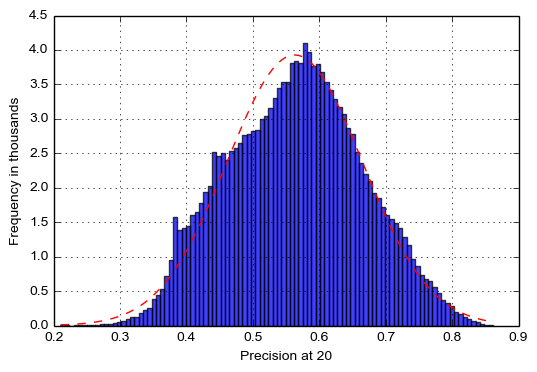

In [13]:
# the histogram of the data
n, bins, patches = plt.hist( data["final_sco"], 100, normed = True, facecolor='blue', alpha=0.75)

mu = data["final_score"].mean()
sigma = data["final_score"].std()
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Precision at '+ PRECISION_N)
plt.ylabel("Frequency in thousands")
plt.grid(True)

plt.show()

In [77]:
data[data["final_score"] > .85]

,Unnamed: 0,Unnamed: 0.1,model_id,validation_date,radius_features,time_features,date,prediction,violations,inspections,...,||parameters||tol,||config||parameters||max_iter,||parameters||C,||parameters||multi_class,score_violation,score||prec_at_1,score||prec_at_5,score||prec_at_10,score||prec_at_20,final_score
34491,34491,34491,58473ebf073a8c31ac43ce39,30Jun2015,50m,6months,30jun2015,0.803209,18.495910,29.729196,...,NaN,NaN,NaN,NaN,0.684414,0.874194,0.848535,0.966008,0.934583,0.861547
33600,33600,33600,58473a0a073a8c30d561bb65,30Jun2015,50m,3months,30jun2015,0.810908,18.012505,29.144835,...,NaN,NaN,NaN,NaN,0.693993,0.905645,0.877953,0.938815,0.868196,0.856920
34057,34057,34057,58473c76073a8c30d561bc85,30Jun2015,50m,3months,30jun2015,0.808188,22.254145,35.338531,...,NaN,NaN,NaN,NaN,0.679550,0.905645,0.838729,0.945613,0.891906,0.852289
34316,34316,34316,58473dd6073a8c31ac43cdc5,30Jun2015,50m,6months,30jun2015,0.809435,19.404483,31.136162,...,NaN,NaN,NaN,NaN,0.677372,0.905645,0.819118,0.979605,0.877680,0.851884
33001,33001,33001,58473670073a8c30d561b9bf,30Jun2015,50m,3months,30jun2015,0.816354,22.571589,35.876926,...,NaN,NaN,NaN,NaN,0.673210,0.874194,0.848535,0.925219,0.935634,0.851358
26036,26036,26036,5846fbf8073a8c9460fa9fb4,30Jun2015,50m,6months,30jun2015,0.835716,19.736311,31.426901,...,NaN,NaN,NaN,NaN,0.664828,0.842742,0.897564,0.938815,0.910874,0.850965


In [14]:
data.sort_values( by = "final_score", ascending = False, inplace = True )
data.head()

,Unnamed: 0,Unnamed: 0.1,model_id,validation_date,radius_features,time_features,date,prediction,violations,inspections,...,||parameters||tol,||config||parameters||max_iter,||parameters||C,||parameters||multi_class,score_violation,score||prec_at_1,score||prec_at_5,score||prec_at_10,score||prec_at_20,final_score
34491,34491,34491,58473ebf073a8c31ac43ce39,30Jun2015,50m,6months,30jun2015,0.803209,18.495910,29.729196,...,NaN,NaN,NaN,NaN,0.684414,0.874194,0.848535,0.966008,0.934583,0.861547
33600,33600,33600,58473a0a073a8c30d561bb65,30Jun2015,50m,3months,30jun2015,0.810908,18.012505,29.144835,...,NaN,NaN,NaN,NaN,0.693993,0.905645,0.877953,0.938815,0.868196,0.856920
34057,34057,34057,58473c76073a8c30d561bc85,30Jun2015,50m,3months,30jun2015,0.808188,22.254145,35.338531,...,NaN,NaN,NaN,NaN,0.679550,0.905645,0.838729,0.945613,0.891906,0.852289
34316,34316,34316,58473dd6073a8c31ac43cdc5,30Jun2015,50m,6months,30jun2015,0.809435,19.404483,31.136162,...,NaN,NaN,NaN,NaN,0.677372,0.905645,0.819118,0.979605,0.877680,0.851884
33001,33001,33001,58473670073a8c30d561b9bf,30Jun2015,50m,3months,30jun2015,0.816354,22.571589,35.876926,...,NaN,NaN,NaN,NaN,0.673210,0.874194,0.848535,0.925219,0.935634,0.851358


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: FutureWarning: 
The default value for 're

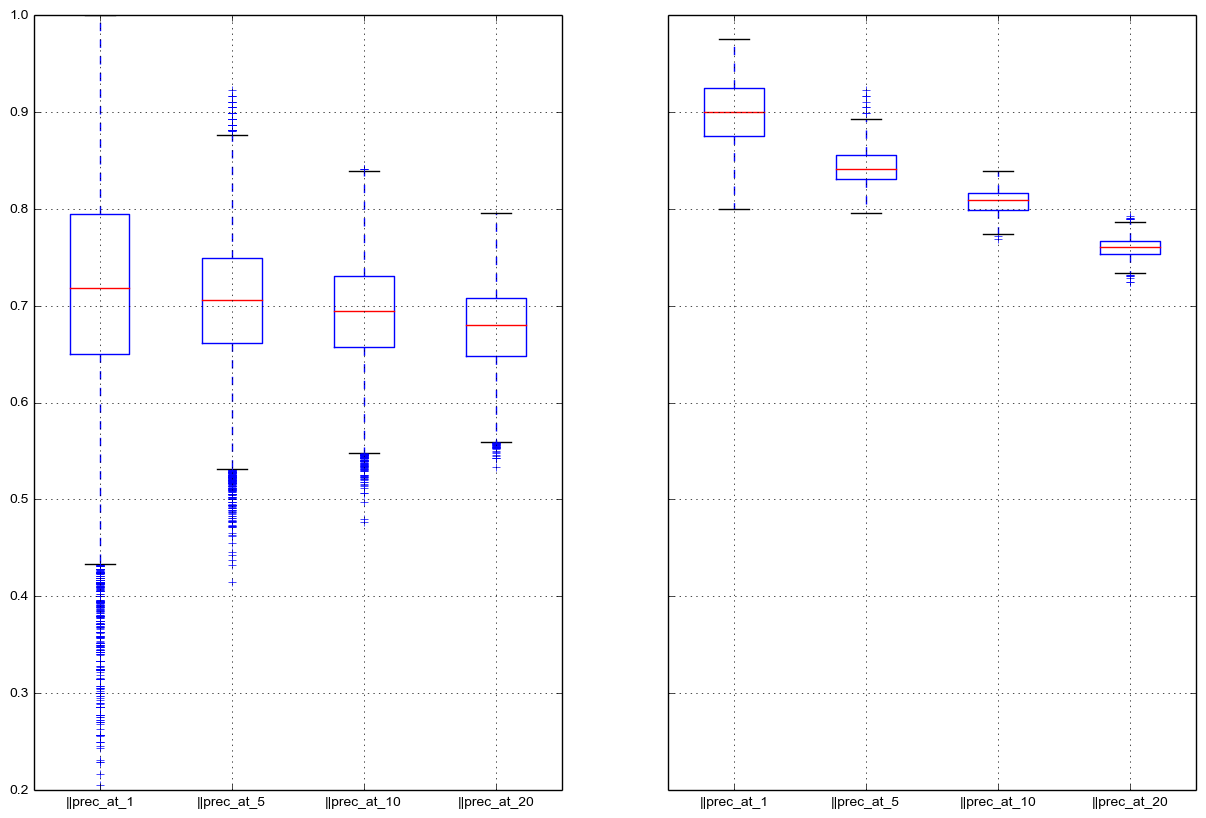

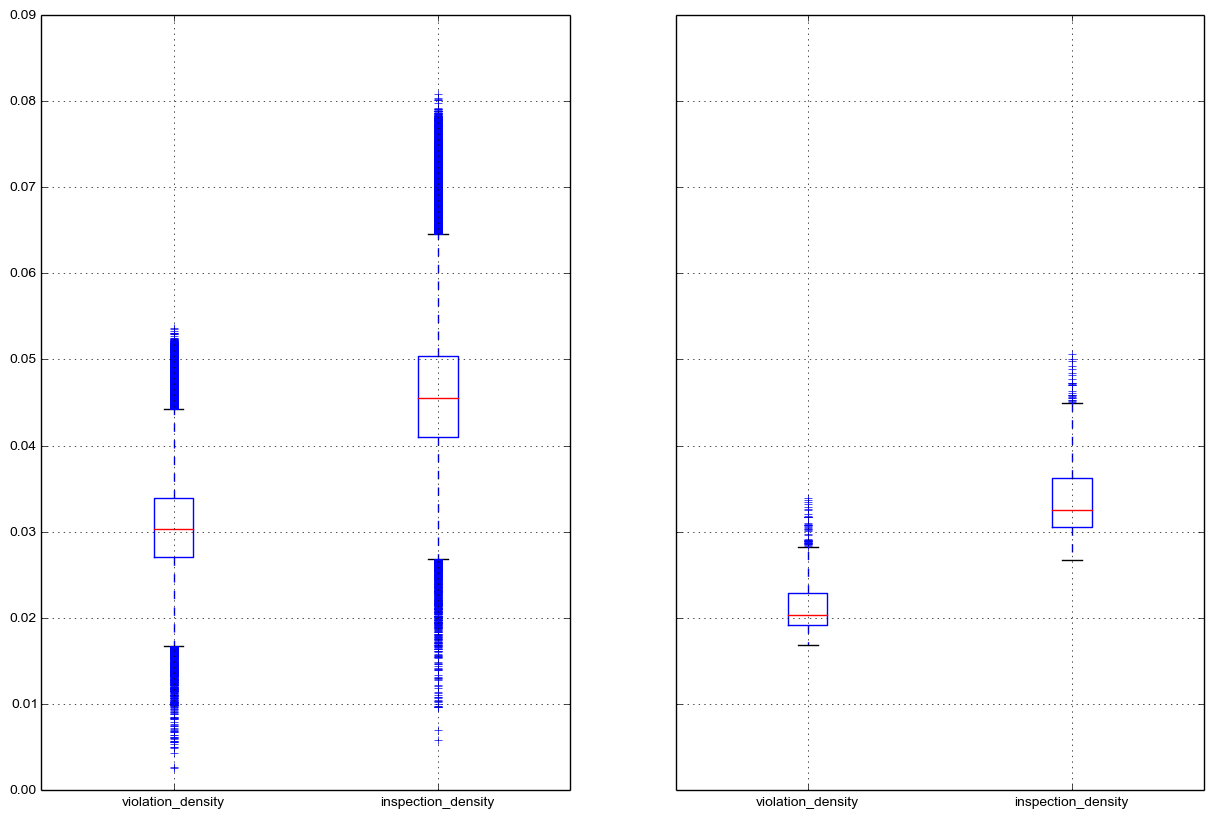

In [15]:
#The distribution of the data when ranking by final score

FINAL_VARIABLE = "final_score"
data.sort_values( by = FINAL_VARIABLE, ascending = False, inplace = True )
prec_label = ["||prec_at_1", "||prec_at_5", "||prec_at_10", "||prec_at_20"]
area_label  = ["violation_density", "inspection_density"]
top_sample = data[0:500]

fig, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey = True)
data.boxplot(column = prec_label, figsize = (10,20), ax = axes1[0])
top_sample.boxplot(column = prec_label, figsize = (10,20), ax = axes1[1])

fig, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey = True)
data.boxplot(column = area_label, figsize = (10,20), ax = axes2[0])
top_sample.boxplot(column = area_label, figsize = (10,20), ax = axes2[1])

plt.show()

So far, we have decided to choose the same score for all models, but what happens when you vary the weights
for all the parameters of the score. The first important to check is which are the optimal weights 

In [87]:
label = ["||prec_at_1", "||prec_at_5", "||prec_at_10", "||prec_at_20", "violation_density", "inspection_density"]
sklearn_pca = sklearnPCA(n_components = 4)
sklearn_pca.fit_transform(data[label])
print(pd.DataFrame(sklearn_pca.components_,columns=data[label].columns,index = ['PC-1','PC-2',
                                                                               'PC-3','PC-4']))
print(sklearn_pca.explained_variance_ratio_)

      ||prec_at_1  ||prec_at_5  ||prec_at_10  ||prec_at_20  violation_density  \
PC-1    -0.775958    -0.450792     -0.354157     -0.263136          -0.002661   
PC-2    -0.624241     0.452067      0.487321      0.410392           0.007053   
PC-3    -0.090243     0.731987     -0.277768     -0.614238           0.015986   
PC-4     0.006437    -0.237932      0.743055     -0.612254           0.067913   

      inspection_density  
PC-1           -0.000284  
PC-2            0.002384  
PC-3            0.036769  
PC-4            0.108394  
[ 0.83090997  0.13423049  0.02316748  0.00687475]


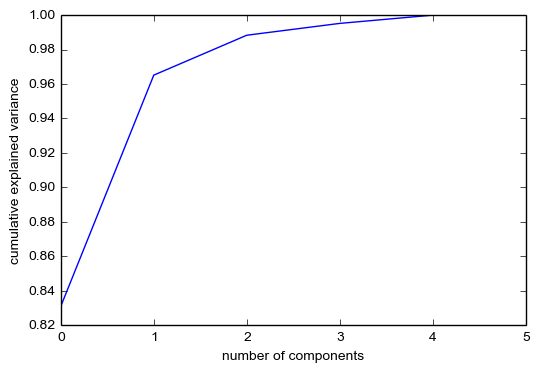

In [10]:
pca = sklearnPCA().fit(data[label])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Now we check how the models change when you go over different weights in your score

In [12]:
dates_list = list(data.validation_date.unique())

In [17]:
validation_date = "31Dec2015"
model_scores = pd.DataFrame()
for date in dates_list:
    data_f = data[data.validation_date == validation_date]
    weights = [0,.2,.4,.6,.8,1]
    permutations(weights)
    perms = list(product(weights, repeat = 5))
    sum1 = list(filter(lambda x: sum(x)==1, perms))

    feat = ["score_violation", "score||prec_at_1", "score||prec_at_5", 
                         "score||prec_at_10", "score||prec_at_20"]

    corr_data = pd.DataFrame()
    corr_data["model_id"] = data_f.model_id
    for i, comb in enumerate(sum1):
        corr_data[str(comb)] = comb[0]*data_f[feat[0]] + comb[1]*data_f[feat[1]] + comb[2]*data_f[feat[2]] + \
                                comb[3]*data_f[feat[3]] + comb[4]*data_f[feat[4]]

    score_list = ['(1, 0, 0, 0, 0)', '(0, 1, 0, 0, 0)', '(0, 0, 1, 0, 0)', '(0, 0, 0, 0, 1)',
                  '(0.6, 0.4, 0, 0, 0)', '(0.6, 0, 0.4, 0, 0)', '(0.6, 0, 0, 0.4, 0)', 
                  '(0.6, 0, 0, 0, 0.4)', '(0, 0.6, 0.4, 0, 0)', 
                  '(0, 0, 0.6, 0.4, 0)', '(0, 0, 0, 0.6, 0.4)', '(0.2, 0.2, 0.2, 0.2, 0.2)']

    
    for score in score_list:
        row = corr_data.sort_values( by = score, 
                          ascending = False).head(1)[["model_id",
                                                     score]]

        row["weights"] = score
        row["key"] = '["score_violation", "score||prec_at_1", "score||prec_at_5", \
                         "score||prec_at_10", "score||prec_at_20"]'
        row["date"] = date
        row = row.rename(columns={score: 'score'})
        model_scores = model_scores.append(row, ignore_index = True)

In [10]:
corr_data.columns

Index(['model_id', '(0, 0, 0, 0, 1)', '(0, 0, 0, 0.2, 0.8)',
       '(0, 0, 0, 0.4, 0.6)', '(0, 0, 0, 0.6, 0.4)', '(0, 0, 0, 0.8, 0.2)',
       '(0, 0, 0, 1, 0)', '(0, 0, 0.2, 0, 0.8)', '(0, 0, 0.2, 0.2, 0.6)',
       '(0, 0, 0.2, 0.4, 0.4)',
       ...
       '(0.6, 0, 0.4, 0, 0)', '(0.6, 0.2, 0, 0, 0.2)', '(0.6, 0.2, 0, 0.2, 0)',
       '(0.6, 0.2, 0.2, 0, 0)', '(0.6, 0.4, 0, 0, 0)', '(0.8, 0, 0, 0, 0.2)',
       '(0.8, 0, 0, 0.2, 0)', '(0.8, 0, 0.2, 0, 0)', '(0.8, 0.2, 0, 0, 0)',
       '(1, 0, 0, 0, 0)'],
      dtype='object', length=127)

In [17]:
score_list = ['(1, 0, 0, 0, 0)', '(0, 1, 0, 0, 0)', '(0, 0, 1, 0, 0)', '(0, 0, 0, 0, 1)',
              '(0.6, 0.4, 0, 0, 0)', '(0.6, 0, 0.4, 0, 0)', '(0.6, 0, 0, 0.4, 0)', 
              '(0.6, 0, 0, 0, 0.4)', '(0, 0.6, 0.4, 0, 0)', 
              '(0, 0, 0.6, 0.4, 0)', '(0, 0, 0, 0.6, 0.4)', '(0.2, 0.2, 0.2, 0.2, 0.2)']

model_scores = pd.DataFrame()
for score in score_list:
    row = corr_data.sort_values( by = score, 
                      ascending = False).head(1)[["model_id",
                                                 score]]
    
    row["weights"] = score
    row["key"] = '["score_violation", "score||prec_at_1", "score||prec_at_5", \
                     "score||prec_at_10", "score||prec_at_20"]'
    row = row.rename(columns={score: 'score'})
    model_scores = model_scores.append(row, ignore_index = True)


In [19]:
model_scores.to_csv("models_for_maps_all_dates.csv")

In [63]:
x = list(corr_data.columns)
corr_data = corr_data.head(50)

In [64]:
matrix_results = [[0 for i in range(len(x))] for i in range(len(x))]

for i, featureA in enumerate(x):
    for j, featureB in enumerate(x[i:]):
        model_listA = corr_data.sort_values( by = featureA, ascending = False )
        model_listB = corr_data.sort_values( by = featureB, ascending = False )
        correlation, pvalue = spearmanr(model_listA.model_id, model_listB.model_id)
        
        matrix_results[i][ i + j] = correlation
      

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


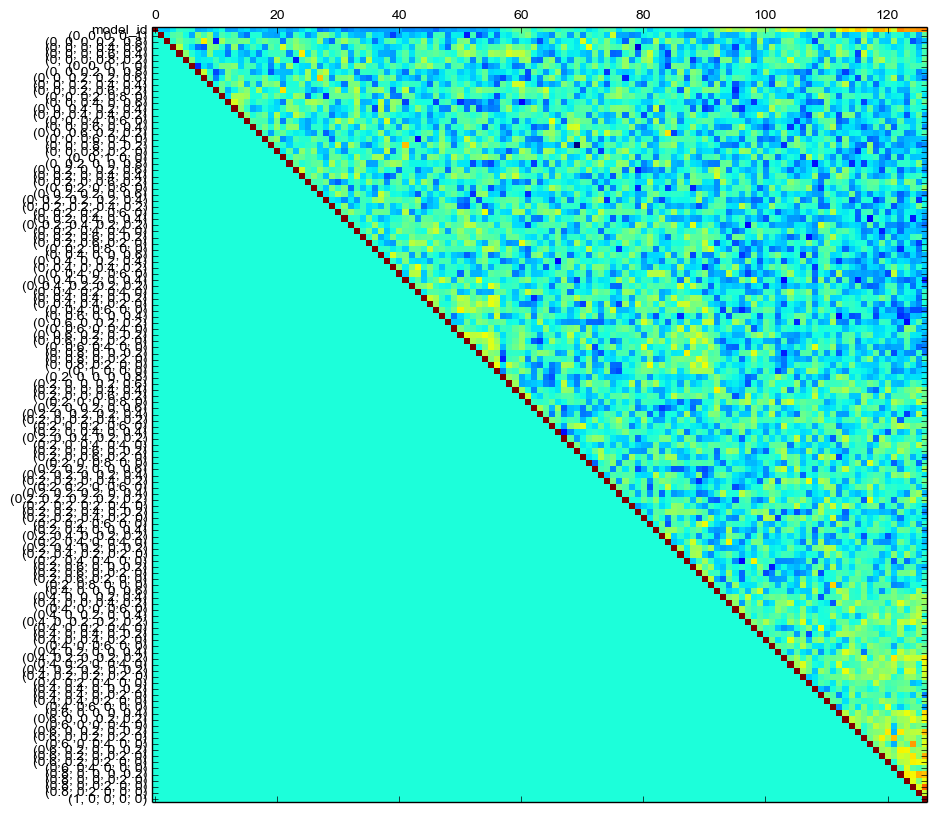

In [65]:
mr = pd.DataFrame(np.array(matrix_results))
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(mr)
plt.yticks(range(len(x)), x);

## Group the models by features, date and classifier

Compute stability over time, over precision

In [93]:
data[data.validation_date == "31Dec2015"].sort_values( by = "violation_density", 
                                                                        ascending = False ).head(10)[["||name","final_score"]]

,||name,final_score
11175,ExtraTreesClassifier,0.340735
18088,ExtraTreesClassifier,0.462799
15496,LogisticRegression,0.503029
14253,ExtraTreesClassifier,0.414798
18119,ExtraTreesClassifier,0.425092
21371,ExtraTreesClassifier,0.464142
18071,ExtraTreesClassifier,0.485765
17666,RandomForestClassifier,0.318262
21648,ExtraTreesClassifier,0.440476
15608,ExtraTreesClassifier,0.474849


In [36]:

prediction1 = pd.read_csv("58467507073a8c2a3516c286")

In [39]:

prediction1.head()

,Unnamed: 0,inspection_date,parcel_id,prediction
0,14696,2015-12-31,017600190209,0.641465
1,38733,2015-12-31,018400030023,0.641465
2,110530,2015-12-31,009500040124,0.641465
3,73088,2015-12-31,005400050112,0.641465
4,145688,2015-12-31,009700020155,0.641465


In [41]:
prediction2 = pd.read_csv("5846ad34073a8c33e0059c01")
spearmanr(prediction1.parcel_id, prediction2.parcel_id)

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.018663754067149201, pvalue=0.00090884923554070888)

Select the best model and show correlation of results with other models 

In [106]:
os.chdir("/mnt/data/economic_development/cincinnati_blight/output/output_nov_2016/top_predictions_on_all_parcels")
SIZE_MATRIX = 50
selected_models = data[data.validation_date == "31Dec2015"].sort_values( by = "violation_density", 
                                                                        ascending = False ).head(SIZE_MATRIX)

In [107]:
model_list = list(selected_models.model_id)
matrix_results = [[0 for i in range(len(model_list))] for i in range(len(model_list))]
matrix_results[0][0]

0

In [108]:
THRESHOLD = .50
for i, model1 in enumerate(model_list):
    for j, model2 in enumerate(model_list[i:]):
        
        prediction1 = pd.read_csv(model1).head(1500)
        prediction2 = pd.read_csv(model2).head(1500)
        
        correlation, pvalue = spearmanr( prediction1.prediction, prediction2.prediction )
        
        matrix_results[i][ i + j] = correlation
        

In [109]:
mr = pd.DataFrame(np.array(matrix_results))

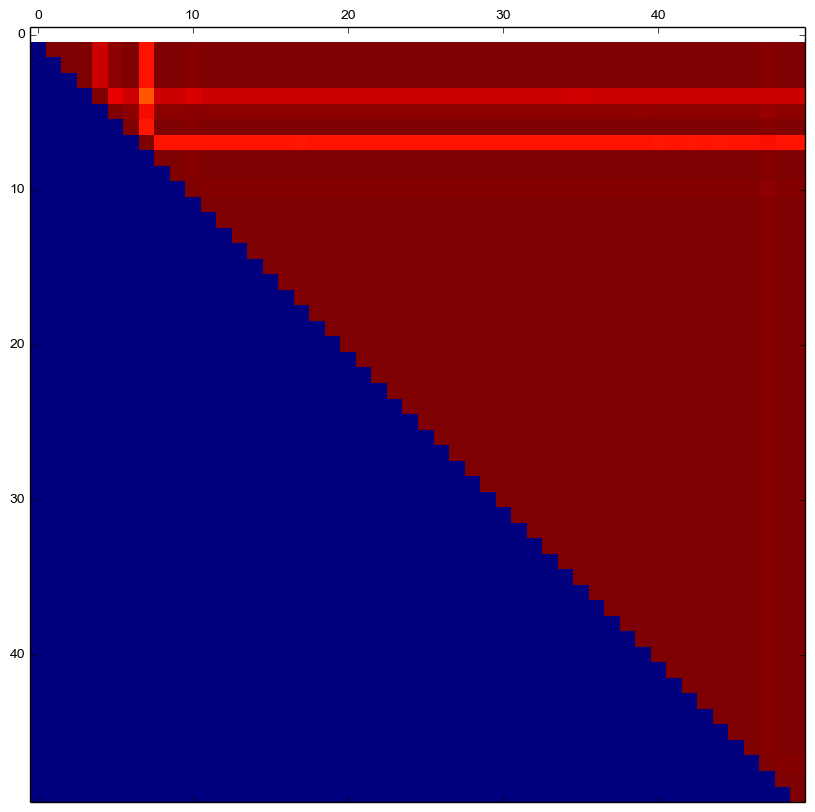

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(mr)

In [ ]:
# Calibrate the scores to see the predictability

## Obtain parameter importance 

In [11]:
#Get list of parameters 
list_parameters = []
for var in data.columns:
    match = re.match("\|\|parameters.+", var)
    if match != None:
        list_parameters.append(match.group(0))
        print(match.group(0))

||parameters||max_features
||parameters||max_depth
||parameters||n_estimators
||parameters||criterion
||parameters||max_leaf_nodes
||parameters||verbose
||parameters||n_jobs
||parameters||oob_score
||parameters||min_samples_leaf
||parameters||warm_start
||parameters||min_samples_split
||parameters||bootstrap
||parameters||class_weight
||parameters||random_state
||parameters||min_weight_fraction_leaf
||parameters||penalty
||parameters||solver
||parameters||intercept_scaling
||parameters||dual
||parameters||max_iter
||parameters||fit_intercept
||parameters||tol
||parameters||C
||parameters||multi_class


In [12]:
#Parse parameter names 
parsed_list = []
for param in list_parameters: 
    parsed_param = param.replace("||parameters||","")
    data.rename(columns = {param:parsed_param}, inplace = True)
    parsed_list.append(parsed_param)
    

In [80]:
#  'max_features': ET, RF
#  'max_depth': ET, RF
#  'n_estimators': ET, RF
#  'criterion': ET, RF
#  'max_leaf_nodes': ET, RF
#  'verbose': ET, RF, LR
#  'n_jobs': ET, RF, LR
#  'oob_score': ET, RF
#  'min_samples_leaf': ET, RF
#  'warm_start': ET, RF, LR
#  'min_samples_split': ET, RF
#  'bootstrap': ET, RF
#  'class_weight': 
#  'random_state': 
#  'min_weight_fraction_leaf': ET, RF
#  'penalty': LR
#  'solver':  LR
#  'intercept_scaling':  LR
#  'dual':  LR
#  'max_iter':  LR
#  'fit_intercept':  LR
#  'tol' : LR
#  'C':  LR
#  'multi_class':  LR
RF_params = parsed_list[0:15]

RF_data = data[data["||name"] == "RandomForestClassifier"]
RF_data = RF_data[RF_params + ["||prec_at_1"]]
RF_data = RF_data.dropna(axis = 1)
RF_data = RF_data.dropna(axis = 0)

dummy_list = ["max_features", "criterion", "oob_score","warm_start", "bootstrap"]
for dummy_v in dummy_list:
    RF_dummy = pd.get_dummies(RF_data[dummy_v])
    RF_dummy.columns = [str(i) + dummy_v for i in list(RF_dummy.columns)]
    RF_data = pd.concat([RF_data, RF_dummy], axis=1)
    RF_data = RF_data.drop(dummy_v, 1)

RF_data["label"] = "Under 80%"
RF_data["label"][RF_data["||prec_at_1"] >= .80] = "Over 80%%"
# RF_data["label"][RF_data["||prec_at_1"] > .2] = "Under 40%"
# RF_data["label"][RF_data["||prec_at_1"] > .4] = "Under 60%"
# RF_data["label"][RF_data["||prec_at_1"] > .6] = "Under 80%"
# RF_data["label"][RF_data["||prec_at_1"] > .8] = "Under 100%"
RF_data = RF_data.drop("||prec_at_1", 1)
label = RF_data["label"]
RF_data = RF_data.drop("label", 1)


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
RF_data.head(5)

,n_estimators,verbose,n_jobs,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,log2max_features,sqrtmax_features,entropycriterion,ginicriterion,Falseoob_score,Falsewarm_start,Truebootstrap
0,1.0,0,5,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0,5,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0,5,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0,5,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0,5,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [60]:
regr = DecisionTreeRegressor(max_depth = 10)
regr = regr.fit(RF_data, label)

In [63]:
dot_data = tree.export_graphviz(regr, out_file='tree.dot', 
                         feature_names = RF_data.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  


In [82]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(RF_data, label)

In [84]:
dot_data = tree.export_graphviz(clf, out_file='tree_clf.dot', 
                         feature_names = RF_data.columns,
                         class_names = label.unique(),
                         filled=True, rounded=True,  
                         special_characters=True,
                         rotate = True)  

In [92]:
#Transform features into columns and get set of features in model 
features = data.ix[:,'||config||features'].unique()
feature_set = set()
for feature_list in features:
    clean_list = feature_list[1:-1].split(",")
    for clean_feature in clean_list:
        feature_set.add(clean_feature)

for feature in feature_set:
    data[feature] = 0
    data.loc[data['||config||features'].str.contains(feature),feature] = 1

In [94]:
feature_data = data[list(feature_set)]
feature_data.head(5)

,u'fire_700m_3months.%',u'fire_200m_3months.%',u'fire_1000m_3months.%',u'sales_400m_6months.total',u'three11_1000m_3months.%',u'density_200m_3months.%',u'permits_400m_3months.total',u'fire_50m_3months.%',u'crime_50m_3months.%',u'crime_400m_3months.%',...,u'three11_200m_12months.%',u'sixweeksweather.%',u'sales_700m_12months.%',u'fire_400m_3months.%',u'sales_1000m_6months.%',u'three11_50m_3months.total',u'permits_50m_6months.total',u'fire_50m_6months.%',u'fire_400m_3months.total',u'density_700m_12months.%'
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [98]:
feature_data.sum(axis = 0)

u'fire_700m_3months.%'               3201
 u'fire_200m_3months.%'              2115
 u'fire_1000m_3months.%'            16842
 u'sales_400m_6months.total'         2950
 u'three11_1000m_3months.%'         16842
 u'density_200m_3months.%'           5065
 u'permits_400m_3months.total'       2950
 u'fire_50m_3months.%'              43135
 u'crime_50m_3months.%'             48668
 u'crime_400m_3months.%'            34146
 u'permits_1000m_3months.%'         16842
 u'permits_1000m_12months.%'        10206
 u'crime_200m_12months.total'        2950
 u'three11_700m_6months.%'           3201
 u'density_50m_12months.%'          28291
u'fire_200m_12months.%'              5032
 u'sales_700m_6months.%'             3201
 u'crime_200m_3months.total'         2950
 u'fire_1000m_12months.%'           10206
 u'density_1000m_12months.%'        10205
 u'tax.%'                            5596
 u'three11_50m_6months.total'        2950
 u'sales_400m_12months.total'        2950
 u'sales_400m_3months.total'      

In [18]:
precisions = ["||prec_at_1", "||prec_at_5", "||prec_at_10", "||prec_at_20"]
stability_chart = data.sort_values( by = "final_score", ascending = False)
stability_chart = stability_chart[precisions].transpose()
stability_chart.head(5)

,34491,33600,34057,34316,33001,26036,26807,33524,34413,34487,...,17188,12735,13485,334,2282,869,9144,4256,4527,22504
||prec_at_1,0.900000,0.925000,0.925000,0.925000,0.900000,0.875000,0.950000,0.875000,0.900000,0.900000,...,0.392857,0.272727,0.473881,0.469388,0.511628,0.409938,0.462121,0.369565,0.321429,0.476190
||prec_at_5,0.845771,0.860697,0.840796,0.830846,0.845771,0.870647,0.850746,0.840796,0.855721,0.840796,...,0.522727,0.519553,0.473881,0.472826,0.442623,0.437788,0.465241,0.431818,0.492823,0.476190
||prec_at_10,0.828784,0.818859,0.821340,0.833747,0.813896,0.818859,0.811414,0.813896,0.813896,0.816377,...,0.573864,0.531335,0.497340,0.534091,0.542500,0.530726,0.513736,0.480114,0.566514,0.476190
||prec_at_20,0.778191,0.760843,0.767038,0.763321,0.778465,0.771995,0.762082,0.781908,0.769517,0.776952,...,0.590071,0.620231,0.567185,0.557123,0.576730,0.597475,0.572877,0.583808,0.566514,0.544554


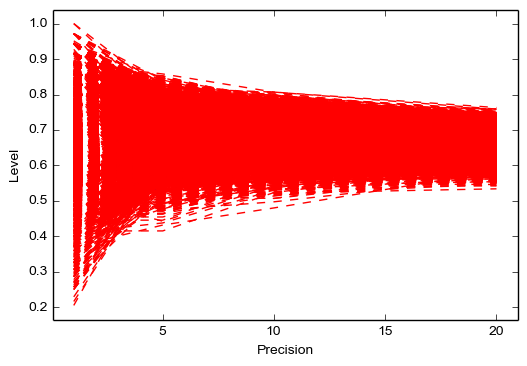

In [22]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for i in range(20000):
    if i < 50:
        ax.plot([1,5,10,20], list(stability_chart.ix[:,i]), 'b--')
    else:
        ax.plot([1,5,10,20], list(stability_chart.ix[:,i]), 'r--')
        

plt.xlabel('Precision')
plt.ylabel('Level')
plt.show()